<a href="https://colab.research.google.com/github/MarcosVel/Deep-Learning/blob/master/ANN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Section 4: Artificial Neural Networks

# Recognition from images of handwritten digits

### Install Tensorflow

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.11.0


### Load in the data

In [ ]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
print("X_train.shape: ", X_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train.shape:  (60000, 28, 28)


### Build the model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Compile the model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [ ]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 6ms/step - loss: 0.2949 - accuracy: 0.9129 - val_loss: 0.1435 - val_accuracy: 0.9562
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1452 - accuracy: 0.9572 - val_loss: 0.1099 - val_accuracy: 0.9675
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1096 - accuracy: 0.9669 - val_loss: 0.0886 - val_accuracy: 0.9717
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0902 - accuracy: 0.9725 - val_loss: 0.0876 - val_accuracy: 0.9729
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0769 - accuracy: 0.9758 - val_loss: 0.0714 - val_accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0662 - accuracy: 0.9789 - val_loss: 0.0743 - val_accuracy: 0.9776
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0599 - accuracy: 0.9808 - val_loss: 0.0696 - val_accuracy

### Plots

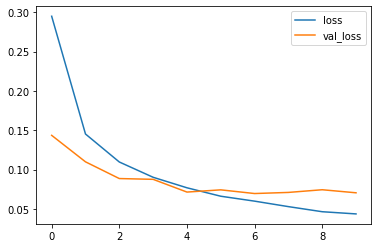

In [ ]:
# loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

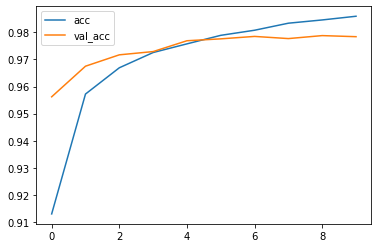

In [ ]:
# accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# evaluate the model
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0705 - accuracy: 0.9784
[0.07050681114196777, 0.9783999919891357]


### Confusion matrix

In [ ]:
y_pred = model.predict(X_test).argmax(axis=1)

# Compute confusion matrix
# cm = tf.math.confusion_matrix(y_test, y_pred) # the accuracy was 97.84%
cm = confusion_matrix(y_test, y_pred) # the accuracy was 97.88%
print(cm)

313/313 [==============================] - 1s 1ms/step
[[ 970    0    2    0    0    0    2    1    5    0]
 [   0 1127    1    0    0    0    2    0    5    0]
 [   2    1 1014    2    0    1    1    5    6    0]
 [   0    0    6  995    0    3    0    2    2    2]
 [   1    0    6    1  953    0    5    2    3   11]
 [   3    0    0   11    1  868    5    0    3    1]
 [   4    3    2    1    1    3  942    0    2    0]
 [   2    6   11    5    0    0    0  993    3    8]
 [   2    1    5    4    4    2    1    2  951    2]
 [   3    5    0   11    8    2    0    4    5  971]]


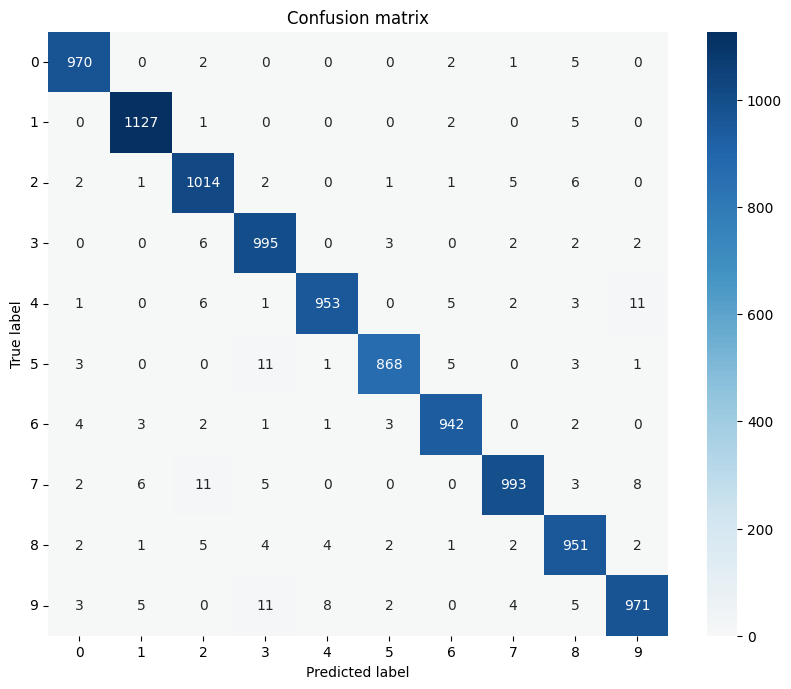

In [ ]:
plt.figure(figsize=(10, 8), dpi=100)

# Plot confusion matrix with diverging colormap and formatted annotations
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu", center=0)
plt.yticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

**Obs.:**

Each row and column in your confusion matrix represents a label. The rows correspond to the true labels and the columns correspond to the predicted labels.

For example, if you look at row 0 and column 0 in your confusion matrix, you will see the value 973. This means that your model correctly predicted 973 instances of class 0 (digit 0) out of all the instances that had a true label of 0.

If you look at row 0 and column 1 in your confusion matrix, you will see the value 0. This means that your model did not predict any instance of class 1 (digit 1) for any instance that had a true label of 0.

In [ ]:
print('sum:', np.sum(cm))
# number of prediction correct
print('trace:', np.trace(cm))

accuracy = np.trace(cm) / np.sum(cm)
print(f"Accuracy: {accuracy * 100:.2f}%")

sum: 10000
trace: 9784
Accuracy: 97.84%


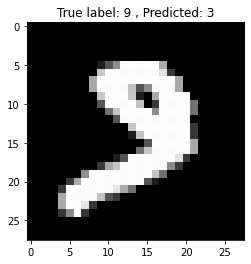

In [ ]:
# show some misclassified examples

misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s , Predicted: %s" % (y_test[i], y_pred[i])); # y_test are the right values of the test